In [1]:
import pyvisa as pv
from anti_qsweepy.drivers.instrument_base_classes import VisaInstrument
import numpy as np
import anti_qsweepy.drivers.Keysight_MXA as drv
import anti_qsweepy.drivers.Keithley_6221 as ktl
import imp
import matplotlib.pyplot as plt
import tables

In [2]:
inst = VisaInstrument("Keysight_MXA")

In [5]:
inst.instr.query("CALC:DATA?")

'2.000000000E+09,-7.668397522E+01,2.006000000E+09,-7.580358887E+01,2.012000000E+09,-7.555175781E+01,2.018000000E+09,-7.770944214E+01,2.024000000E+09,-7.802922821E+01,2.030000000E+09,-7.542176056E+01,2.036000000E+09,-7.540431976E+01,2.042000000E+09,-7.421561432E+01,2.048000000E+09,-7.565611267E+01,2.054000000E+09,-7.626040649E+01,2.060000000E+09,-7.613426971E+01,2.066000000E+09,-7.526888275E+01,2.072000000E+09,-7.444485474E+01,2.078000000E+09,-7.656345367E+01,2.084000000E+09,-7.523027802E+01,2.090000000E+09,-7.489057159E+01,2.096000000E+09,-7.416710663E+01,2.102000000E+09,-7.285588837E+01,2.108000000E+09,-7.547145081E+01,2.114000000E+09,-7.345626068E+01,2.120000000E+09,-7.550646973E+01,2.126000000E+09,-7.458138275E+01,2.132000000E+09,-7.375738525E+01,2.138000000E+09,-7.649179840E+01,2.144000000E+09,-7.476997375E+01,2.150000000E+09,-7.693054199E+01,2.156000000E+09,-7.465493774E+01,2.162000000E+09,-7.490072632E+01,2.168000000E+09,-7.394274902E+01,2.174000000E+09,-7.461563873E+01,2.1800000

In [11]:
s = "1,2,3"

In [13]:
np.fromstring(s, sep =",")

array([1., 2., 3.])

In [19]:
a = np.array((1,2,3,4,5))

In [20]:
a[1::2]

array([2, 4])

In [40]:
imp.reload(drv)

<module 'anti_qsweepy.drivers.Keysight_MXA' from 'D:\\python_libs\\anti_qsweepy\\drivers\\Keysight_MXA.py'>

In [41]:
sa = drv.SpectrumAnalyzer('Keysight_MXA')

In [49]:
sa.soft_trig_arm()
data = sa.read_data()
sa.soft_trig_abort()

In [26]:
data

array([-76.1481781 , -75.55635071, -75.78707886, ..., -72.0617218 ,
       -72.47499847, -73.00074768])

In [45]:
F = sa.freq_points()

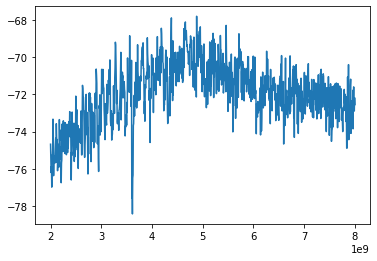

In [46]:
plt.plot(F,data)

In [47]:
sa.vbw(10)

10

In [48]:
sa.vbw()

10.0

In [5]:
inst.instr.timeout=20000

In [6]:
inst.instr.timeout

20000

In [9]:
6.62e9/484e12

1.3677685950413224e-05

In [2]:
f_zero_bias = tables.open_file('D:\\Belanovsky\\2023-08-11\\14-47-04-Spec_vs_Bias_zero_4-5GHz\\data.h5', mode='r')

In [3]:
data_2d_zero_bias = np.array(f_zero_bias.root.data)
'''c_coord = array(f.root.column_coordinate)
r_cord = array(f.root.row_coordinate)

pcolormesh( c_coord, r_cord, db(abs(data_2d)) )
colorbar()
show()

f.close()'''

'c_coord = array(f.root.column_coordinate)\nr_cord = array(f.root.row_coordinate)\n\npcolormesh( c_coord, r_cord, db(abs(data_2d)) )\ncolorbar()\nshow()\n\nf.close()'

In [4]:
f_zero_bias.close()

In [5]:
dbm = lambda x: 10*np.log10(x/1e-3)

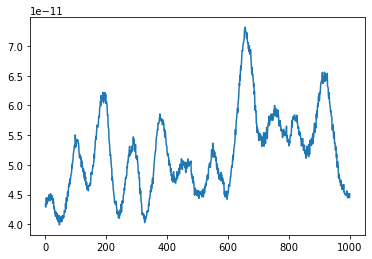

In [6]:
plt.plot( abs(data_2d_zero_bias.T) )

In [8]:
f = tables.open_file('D:\\Belanovsky\\2023-08-11\\14-35-33-Spec_vs_Bias\\data.h5', mode='r')
data_2d = np.array(f.root.data)
f.close()

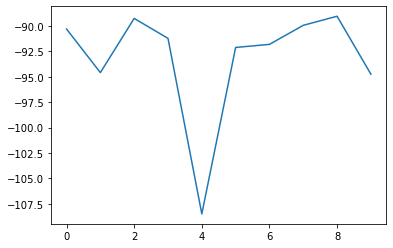

In [19]:
plt.plot( dbm(abs(data_2d - data_2d_zero_bias)).T[1] )

In [16]:
(data_2d - data_2d_zero_bias)[1]

array([ 9.48428230e-13+0.j, -3.47339743e-13+0.j, -3.12611694e-13+0.j, ...,
       -2.91224145e-13+0.j,  3.26600011e-13+0.j, -8.18427880e-14+0.j])

In [2]:
bias_source = ktl.CurrentSource('Keithley_6221')

In [10]:
bias_source.output('off')

0